<a href="https://colab.research.google.com/github/hosseindamavandi/Fake-News-Detection/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
%cd drive/MyDrive/Neuromatch

/content/drive/.shortcut-targets-by-id/1bAi905nr5UAibg9j-3UYECnBLJNvA4qo/Neuromatch


##Importing Libraries

In [3]:
"""
data manipulatig
"""
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
"""
natural language processing
"""
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
"""
pytorch
"""

import torch
import torch.nn as nn

In [6]:
"""
visualization tools
"""

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
"""
train test split
"""
from sklearn.model_selection import train_test_split

In [22]:
true_data = pd.read_csv('datasets/True.csv')
fake_data = pd.read_csv('datasets/Fake.csv')
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [23]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [24]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [25]:
# Adding labels
true_data["label"] = np.ones(len(true_data),dtype=int)
fake_data["label"] = np.zeros(len(fake_data),dtype=int)

true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [26]:
data = pd.concat((true_data,fake_data),axis=0)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB
None


In [28]:
data = data.sample(frac=1)
data.head(10)

,title,text,subject,date,label
3666,FASCISM: Republicans Publish List Of ‘Anti-Am...,Conservatives have set up a fascist professor...,News,"November 27, 2016",0
4428,House panel to consider tweaks to healthcare b...,WASHINGTON (Reuters) - A U.S. House of Represe...,politicsNews,"April 6, 2017",1
14895,Nepal scraps $2.5 billion hydropower plant dea...,KATHMANDU (Reuters) - Nepal has scrapped a $2....,worldnews,"November 14, 2017",1
74,Tax bill's 'pass-through' rule will aid wealth...,WASHINGTON (Reuters) - Wealthy business owners...,politicsNews,"December 20, 2017",1
7922,Commentary: Manic or evasive - these veep guys...,After going through a week reminiscent of Napo...,politicsNews,"October 5, 2016",1
9777,SAN JUAN Mayor’s “NASTY” Secret Reveals REAL R...,"Last week, President Trump made a public anno...",politics,"Sep 30, 2017",0
19912,Myanmar says U.S. official barred from Rohingy...,YANGON (Reuters) - Myanmar said on Friday a vi...,worldnews,"September 15, 2017",1
6645,Republican West Virginia Lawmaker Wants You T...,Whenever Republicans dredge up a certain speci...,News,"April 29, 2016",0
22621,Ron Paul: ‘I Can’t Support Trump if He’s GOP P...,David Sherfinski Washington TimesFormer Texas...,US_News,"March 20, 2016",0
9369,Push for encryption law falters despite Apple ...,WASHINGTON/ SAN FRANCISCO (Reuters) - After a ...,politicsNews,"May 27, 2016",1


In [31]:
sns.countplot(data["label"])
plt.show()

ValueError: ignored

In [32]:
data["subject"].value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [33]:
data = pd.get_dummies(data,columns=["subject"])
data.head()

,title,text,date,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
3666,FASCISM: Republicans Publish List Of ‘Anti-Am...,Conservatives have set up a fascist professor...,"November 27, 2016",0,0,0,1,0,0,0,0,0
4428,House panel to consider tweaks to healthcare b...,WASHINGTON (Reuters) - A U.S. House of Represe...,"April 6, 2017",1,0,0,0,0,0,0,1,0
14895,Nepal scraps $2.5 billion hydropower plant dea...,KATHMANDU (Reuters) - Nepal has scrapped a $2....,"November 14, 2017",1,0,0,0,0,0,0,0,1
74,Tax bill's 'pass-through' rule will aid wealth...,WASHINGTON (Reuters) - Wealthy business owners...,"December 20, 2017",1,0,0,0,0,0,0,1,0
7922,Commentary: Manic or evasive - these veep guys...,After going through a week reminiscent of Napo...,"October 5, 2016",1,0,0,0,0,0,0,1,0


In [34]:
data = data.drop("date",axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 3666 to 11565
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   title                    44898 non-null  object
 1   text                     44898 non-null  object
 2   label                    44898 non-null  int64 
 3   subject_Government News  44898 non-null  uint8 
 4   subject_Middle-east      44898 non-null  uint8 
 5   subject_News             44898 non-null  uint8 
 6   subject_US_News          44898 non-null  uint8 
 7   subject_left-news        44898 non-null  uint8 
 8   subject_politics         44898 non-null  uint8 
 9   subject_politicsNews     44898 non-null  uint8 
 10  subject_worldnews        44898 non-null  uint8 
dtypes: int64(1), object(2), uint8(8)
memory usage: 2.7+ MB


In [36]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [37]:
new_text = []
pattern = "[^a-zA-Z]"
lemma = nltk.WordNetLemmatizer()

for txt in data.text:

    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_text.append(txt)


new_text[0]

'conservative have set up a fascist professor watchlist website in order to target professor they feel aren t conservative enough a professor are teacher and reality ha a liberal bias it s likely to get pretty extensive the project by turning point usa wa set up by year old conservative wonderboy charlie kirk a young man who is clearly frustrated by the lack of reception among his peer for his fascist and anti american ideal the about u section on their website read the mission of professor watchlist is to expose and document college professor who discriminate against conservative student and advance leftist propaganda in the classroom help u identify and expose more professor who have demonstrated liberal bias in the classroom donate today it s interesting that a group whose favorite slogan is big government suck doesn t understand how supporting the new administration s war on speech is the most intrusive government ever get it s important to remember that when a republican say somet

In [38]:
new_title = []
for txt in data.title:

    txt = re.sub(pattern," ",txt) # Cleaning
    txt = txt.lower() # Lowering
    txt = nltk.word_tokenize(txt) # Tokenizing
    txt = [lemma.lemmatize(word) for word in txt] # Lemmatizing
    txt = " ".join(txt)
    new_title.append(txt)
new_title[0]

'fascism republican publish list of anti american professor declare war on higher education'

In [39]:
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(new_title).toarray()
text_matrix = vectorizer_text.fit_transform(new_text).toarray()

print("Finished")

Finished


In [40]:
data.head()

,title,text,label,subject_Government News,subject_Middle-east,subject_News,subject_US_News,subject_left-news,subject_politics,subject_politicsNews,subject_worldnews
3666,FASCISM: Republicans Publish List Of ‘Anti-Am...,Conservatives have set up a fascist professor...,0,0,0,1,0,0,0,0,0
4428,House panel to consider tweaks to healthcare b...,WASHINGTON (Reuters) - A U.S. House of Represe...,1,0,0,0,0,0,0,1,0
14895,Nepal scraps $2.5 billion hydropower plant dea...,KATHMANDU (Reuters) - Nepal has scrapped a $2....,1,0,0,0,0,0,0,0,1
74,Tax bill's 'pass-through' rule will aid wealth...,WASHINGTON (Reuters) - Wealthy business owners...,1,0,0,0,0,0,0,1,0
7922,Commentary: Manic or evasive - these veep guys...,After going through a week reminiscent of Napo...,1,0,0,0,0,0,0,1,0


In [41]:
data.drop(["title","text"],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 3666 to 11565
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   label                    44898 non-null  int64
 1   subject_Government News  44898 non-null  uint8
 2   subject_Middle-east      44898 non-null  uint8
 3   subject_News             44898 non-null  uint8
 4   subject_US_News          44898 non-null  uint8
 5   subject_left-news        44898 non-null  uint8
 6   subject_politics         44898 non-null  uint8
 7   subject_politicsNews     44898 non-null  uint8
 8   subject_worldnews        44898 non-null  uint8
dtypes: int64(1), uint8(8)
memory usage: 2.0 MB


In [42]:
print(data.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 9)
(44898, 1000)
(44898, 4000)


In [43]:
# Creating Y
y = data.label
# Creating X
x = np.concatenate((np.array(data.drop("label",axis=1)),title_matrix,text_matrix),axis=1)

In [44]:
print(x.shape)
print(y.shape)

(44898, 5008)
(44898,)


In [45]:
from sklearn.model_selection import train_test_split

# Train Test Split
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33673, 5008)
(11225, 5008)
(33673,)
(11225,)


In [46]:
class ANN(nn.Module):

    def __init__(self):

        super(ANN,self).__init__() # Inhertiting

        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000
        self.relu1 = nn.ReLU() # Actfunc 1

        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.relu2 = nn.ReLU()

        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.relu3 = nn.ReLU()

        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT


    def forward(self,x):

        out = self.linear1(x) # Input Layer
        out = self.relu1(out)

        out = self.linear2(out) # Hidden Layer 1
        out = self.relu2(out)

        out = self.linear3(out) # Hidden Layer 2
        out = self.relu3(out)

        out = self.linear4(out) # Hidden Layer 3
        out = self.relu4(out)


        out = self.linear5(out) # Output Layer

        return out


model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss()

In [47]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

EPOCHS = 20

for epoch in range(EPOCHS):

    # Clearing gradients
    optimizer.zero_grad()

    # Forward Propagation
    outs = model(X_train)

    # Computing Loss
    loss = error(outs,Y_train)

    # Backward propagation
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Printing loss
    print(f"Loss after iteration {epoch} is {loss}")


Loss after iteration 0 is 0.6952688097953796
Loss after iteration 1 is 1.488537073135376
Loss after iteration 2 is 1.2778661251068115
Loss after iteration 3 is 0.708517849445343
Loss after iteration 4 is 0.7219969630241394
Loss after iteration 5 is 0.6974412798881531
Loss after iteration 6 is 0.6825364828109741
Loss after iteration 7 is 4.603274822235107
Loss after iteration 8 is 0.8844700455665588
Loss after iteration 9 is 3.0636372566223145
Loss after iteration 10 is 1.3452000617980957
Loss after iteration 11 is 2.435046911239624
Loss after iteration 12 is 2.171478271484375
Loss after iteration 13 is 1.1181217432022095
Loss after iteration 14 is 0.5490331053733826
Loss after iteration 15 is 0.5265834927558899
Loss after iteration 16 is 0.5672391653060913
Loss after iteration 17 is 0.48370814323425293
Loss after iteration 18 is 0.42465275526046753
Loss after iteration 19 is 0.40535664558410645


In [50]:
# Importing metrics
from sklearn.metrics import accuracy_score,confusion_matrix


# Prediction
y_head = model(X_test)
print(y_head[0])
# Converting Prediction into labels
y_pred = torch.max(y_head,1)[1]
print(y_pred[0])

# Accuracy score
print("Model accuracy is ",accuracy_score(y_pred,Y_test))

tensor([-21.2840, -16.7097], grad_fn=<SelectBackward0>)
tensor(1)
Model accuracy is  0.8791091314031181


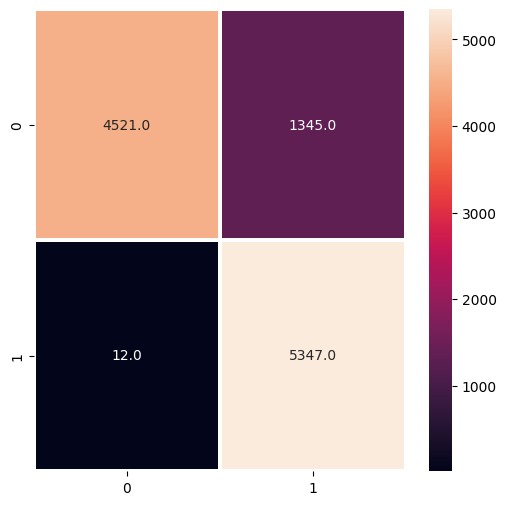

In [51]:
confusion_matrix = confusion_matrix(y_pred=y_pred,y_true=Y_test)

fig,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_matrix,annot=True,fmt="0.1f",linewidths=1.5)
plt.show()

##Importing The Data

In [8]:
import pandas as pd

df = pd.read_csv('cleaned-dataset/cleaned-datasets.csv')

In [9]:
df.head()

,Unnamed: 0,title,text,subject,date,label
0,0,"['donald', 'trump', 'send', 'embarrass', 'new'...","['donald', 'trump', 'wish', 'american', 'happi...",['news'],"['decemb', '31', '2017']",1
1,1,"['drunk', 'brag', 'trump', 'staffer', 'start',...","['hous', 'intellig', 'committe', 'chairman', '...",['news'],"['decemb', '31', '2017']",1
2,2,"['sheriff', 'david', 'clark', 'becom', 'intern...","['friday', 'reveal', 'former', 'milwauke', 'sh...",['news'],"['decemb', '30', '2017']",1
3,3,"['trump', 'obsess', 'even', 'obama', 'name', '...","['christma', 'day', 'donald', 'trump', 'announ...",['news'],"['decemb', '29', '2017']",1
4,4,"['pope', 'franci', 'call', 'donald', 'trump', ...","['pope', 'franci', 'use', 'annual', 'christma'...",['news'],"['decemb', '25', '2017']",1


##vectorize and split into train and test sets

In [10]:
vectorizer_title = CountVectorizer(stop_words="english",max_features=1000)
vectorizer_text = CountVectorizer(stop_words="english",max_features=4000)

title_matrix = vectorizer_title.fit_transform(df['text']).toarray()
text_matrix = vectorizer_text.fit_transform(df['title']).toarray()

In [11]:
df.head()

,Unnamed: 0,title,text,subject,date,label
0,0,"['donald', 'trump', 'send', 'embarrass', 'new'...","['donald', 'trump', 'wish', 'american', 'happi...",['news'],"['decemb', '31', '2017']",1
1,1,"['drunk', 'brag', 'trump', 'staffer', 'start',...","['hous', 'intellig', 'committe', 'chairman', '...",['news'],"['decemb', '31', '2017']",1
2,2,"['sheriff', 'david', 'clark', 'becom', 'intern...","['friday', 'reveal', 'former', 'milwauke', 'sh...",['news'],"['decemb', '30', '2017']",1
3,3,"['trump', 'obsess', 'even', 'obama', 'name', '...","['christma', 'day', 'donald', 'trump', 'announ...",['news'],"['decemb', '29', '2017']",1
4,4,"['pope', 'franci', 'call', 'donald', 'trump', ...","['pope', 'franci', 'use', 'annual', 'christma'...",['news'],"['decemb', '25', '2017']",1


In [12]:
# df.drop(["title","text"],axis=1,inplace=True)
# df.info()

In [13]:
print(df.shape)
print(title_matrix.shape)
print(text_matrix.shape)

(44898, 6)
(44898, 1000)
(44898, 4000)


In [14]:
# Creating Y
y = df.label
# Creating X
x = np.concatenate((np.array(df.drop("label",axis=1)),title_matrix,text_matrix),axis=1)

In [15]:
print(x.shape)
print(y.shape)

(44898, 5005)
(44898,)


In [16]:
print(x)

[[0
  "['donald', 'trump', 'send', 'embarrass', 'new', 'year', 'eve', 'messag', 'disturb']"
  "['donald', 'trump', 'wish', 'american', 'happi', 'new', 'year', 'leav', 'instead', 'give', 'shout', 'enemi', 'hater', 'dishonest', 'fake', 'news', 'medium', 'former', 'realiti', 'show', 'star', 'one', 'job', 'countri', 'rapidli', 'grow', 'stronger', 'smarter', 'want', 'wish', 'friend', 'support', 'enemi', 'hater', 'even', 'dishonest', 'fake', 'news', 'medium', 'happi', 'healthi', 'new', 'year', 'presid', 'angri', 'pant', 'tweet', '2018', 'great', 'year', 'america', 'countri', 'rapidli', 'grow', 'stronger', 'smarter', 'want', 'wish', 'friend', 'support', 'enemi', 'hater', 'even', 'dishonest', 'fake', 'news', 'medium', 'happi', 'healthi', 'new', 'year', '2018', 'great', 'year', 'america', 'donald', 'j', 'trump', 'realdonaldtrump', 'decemb', '31', '2017trump', 'tweet', 'went', 'welll', 'expectwhat', 'kind', 'presid', 'send', 'new', 'year', 'greet', 'like', 'despic', 'petti', 'infantil', 'gibberi

In [17]:
# Split into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(x,np.array(y),test_size=0.25,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(33673, 5005)
(11225, 5005)
(33673,)
(11225,)


##Building Model Using Pytorch

In [18]:
class ANN(nn.Module):

    def __init__(self):

        super(ANN,self).__init__() # Inhertiting

        self.linear1 = nn.Linear(5008,2000) # IN 5008 OUT 2000
        self.relu1 = nn.ReLU() # Actfunc 1

        self.linear2 = nn.Linear(2000,500) # IN 2000 OUT 500
        self.relu2 = nn.ReLU()

        self.linear3 = nn.Linear(500,100) # IN 500 OUT 100
        self.relu3 = nn.ReLU()

        self.linear4 = nn.Linear(100,20) # IN 100 OUT 20
        self.relu4 = nn.ReLU()

        self.linear5 = nn.Linear(20,2) # IN 20 OUT 2 | OUTPUT


    def forward(self,x):

        out = self.linear1(x) # Input Layer
        out = self.relu1(out)

        out = self.linear2(out) # Hidden Layer 1
        out = self.relu2(out)

        out = self.linear3(out) # Hidden Layer 2
        out = self.relu3(out)

        out = self.linear4(out) # Hidden Layer 3
        out = self.relu4(out)


        out = self.linear5(out) # Output Layer

        return out


model = ANN()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)
error = nn.CrossEntropyLoss()

In [21]:
from gensim.models import Word2Vec
import numpy as np

# Train Word2Vec on your preprocessed text data
word2vec_model = Word2Vec(sentences=train_texts, size=100, window=5, min_count=1, workers=4)

# Get the word embeddings from the Word2Vec model
word_embeddings = word2vec_model.wv

# Convert text sequences to Word2Vec embeddings
train_embeddings = []
for sequence in train_sequences:
    sequence_embeddings = [word_embeddings[word] for word in sequence if word in word_embeddings]
    if len(sequence_embeddings) > 0:
        sequence_embeddings = np.vstack(sequence_embeddings)
        mean_embedding = np.mean(sequence_embeddings, axis=0)
        train_embeddings.append(mean_embedding)
train_embeddings = np.vstack(train_embeddings)

test_embeddings = []
for sequence in test_sequences:
    sequence_embeddings = [word_embeddings[word] for word in sequence if word in word_embeddings]
    if len(sequence_embeddings) > 0:
        sequence_embeddings = np.vstack(sequence_embeddings)
        mean_embedding = np.mean(sequence_embeddings, axis=0)
        test_embeddings.append(mean_embedding)
test_embeddings = np.vstack(test_embeddings)

# Convert embeddings to PyTorch tensors
X_train = torch.Tensor(train_embeddings)
X_test = torch.Tensor(test_embeddings)

# Convert labels to PyTorch tensors
Y_train = torch.Tensor(train_labels).type(torch.LongTensor)
Y_test = torch.Tensor(test_labels).type(torch.LongTensor)


NameError: ignored

##Fitting Model Using Pytorch

In [19]:
print(X_train)

[[2979
  "['watch', 'trump', 'doesnt', 'want', 'u', 'rememb', 'said', 'russia', '2014']"
  "['time', 'go', 'becom', 'ever', 'clearer', 'trump', 'russia', 'puppet', 'everi', 'possibl', 'owe', 'money', 'repeatedli', 'blast', 'intellig', 'commun', 'dare', 'say', 'russia', 'inde', 'engag', 'concert', 'campaign', 'influenc', 'elect', 'trump', 'favor', 'alway', 'feel', 'way', 'alway', 'russia', 'puppetit', 'seem', 'word', 'know', 'recent', '2014', 'said', 'seri', 'interview', 'mitt', 'romney', 'right', 'say', 'russia', 'greatest', 'geopolit', 'foe', 'mitt', 'said', 'russia', 'hell', 'problem', 'everybodi', 'laugh', 'includ', 'certain', 'medium', 'way', 'laugh', 'turn', 'absolut', 'right', 'look', 'russia', 'iran', 'control', 'situat', 'syria', 'virtual', 'everi', 'place', 'also', 'insinu', 'obama', 'putin', 'puppet', 'felt', 'meek', 'cowardli', 'face', 'threat', 'definit', 'strong', 'definit', 'sanction', 'show', 'strength', 'mean', 'putin', 'eaten', 'obama', 'lunch', 'therefor', 'lunch', 'l

In [20]:
# Converting numpy arrays into pytorch tensors
X_train = torch.Tensor(X_train)

# You must convert it into LongTensor. I did it once
Y_train = torch.Tensor(Y_train).type(torch.LongTensor)

X_test = torch.Tensor(X_test)
Y_test = torch.Tensor(Y_test)

EPOCHS = 20

for epoch in range(EPOCHS):

    # Clearing gradients
    optimizer.zero_grad()

    # Forward Propagation
    outs = model(X_train)

    # Computing Loss
    loss = error(outs,Y_train)

    # Backward propagation
    loss.backward()

    # Updating parameters
    optimizer.step()

    # Printing loss
    print(f"Loss after iteration {epoch} is {loss}")


TypeError: ignored